In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from data import cg

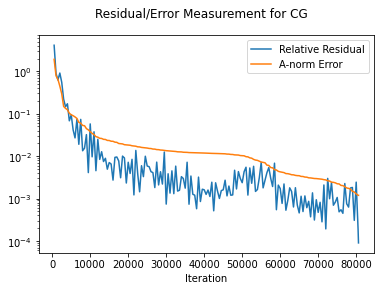

In [3]:
cg_iter = np.array([k['iter'] for k in cg.iter_data])
cg_duration = np.array([k['duration'] for k in cg.iter_data])
cg_residual = np.array([k['rho'] for k in cg.iter_data])
cg_errA = np.array([k['err_A'] for k in cg.iter_data])
fig, ax = plt.subplots()
ax.semilogy(cg_iter, cg_residual, label="Relative Residual")
ax.semilogy(cg_iter, cg_errA, label="A-norm Error")
fig.suptitle("Residual/Error Measurement for CG")
ax.set_xlabel("Iteration")
_ = ax.legend()
fig.savefig("gfx/cg_error_plot.png")

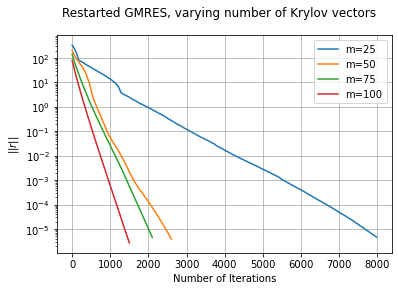

In [4]:
from data import restarted_gmres_100_precond_0, restarted_gmres_25_precond_0, restarted_gmres_50_precond_0, restarted_gmres_75_precond_0
no_precond = [restarted_gmres_25_precond_0, restarted_gmres_50_precond_0, restarted_gmres_75_precond_0, restarted_gmres_100_precond_0]
iters = [[j['iter'] for j in i.iter_data] for i in no_precond]
time = [np.cumsum(1000*np.array([j['duration'] for j in i.iter_data])) for i in no_precond]
rho = [[j['rho'] for j in i.iter_data] for i in no_precond]
num_vecs = [i.krylov_size for i in no_precond]
fig, ax = plt.subplots()
fig.suptitle("Restarted GMRES, varying number of Krylov vectors")
ax.set_xlabel("Number of Iterations")
ax.set_ylabel("$||r||$")
ax.grid()
for data in zip(iters, rho, num_vecs):
    ax.semilogy(data[0], data[1], label=f"m={data[2]}")
_ = ax.legend()
fig.savefig("gfx/rgmres_none_iter.png")

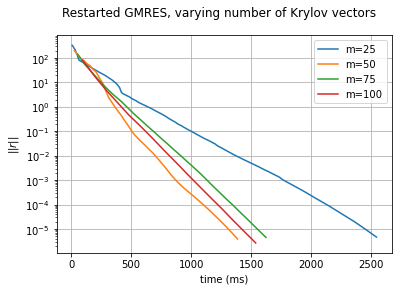

In [5]:
fig, ax = plt.subplots()
fig.suptitle("Restarted GMRES, varying number of Krylov vectors")
ax.set_xlabel("time (ms)")
ax.set_ylabel("$||r||$")
ax.grid()
for data in zip(time, rho, num_vecs):
    ax.semilogy(data[0], data[1], label=f"m={data[2]}")
_ = ax.legend()
fig.savefig("gfx/rgmres_none_time.png")

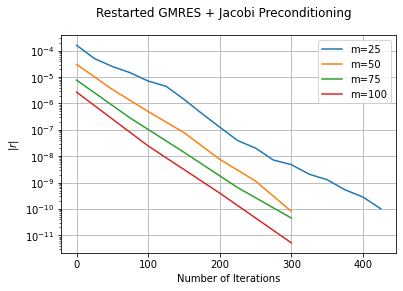

In [6]:
from data import restarted_gmres_100_precond_1, restarted_gmres_25_precond_1, restarted_gmres_50_precond_1, restarted_gmres_75_precond_1
jac_precond = [restarted_gmres_25_precond_1, restarted_gmres_50_precond_1, restarted_gmres_75_precond_1, restarted_gmres_100_precond_1]
iters = [[j['iter'] for j in i.iter_data] for i in jac_precond]
time = [np.cumsum(1000*np.array([j['duration'] for j in i.iter_data])) for i in jac_precond]
rho = [[j['rho'] for j in i.iter_data] for i in jac_precond]
num_vecs = [i.krylov_size for i in jac_precond]
fig, ax = plt.subplots()
fig.suptitle("Restarted GMRES + Jacobi Preconditioning")
ax.set_xlabel("Number of Iterations")
ax.set_ylabel("$\\|r\\|$")
ax.grid()
for data in zip(iters, rho, num_vecs):
    ax.semilogy(data[0], data[1], label=f"m={data[2]}")
_ = ax.legend()
fig.savefig("gfx/rgmres_jac_iter.png")

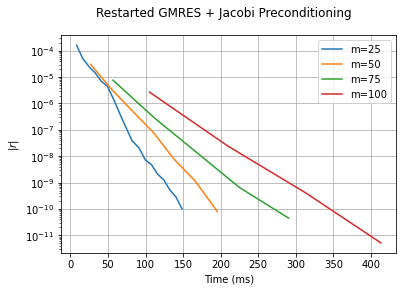

In [7]:
fig, ax = plt.subplots()
fig.suptitle("Restarted GMRES + Jacobi Preconditioning")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("$\\|r\\|$")
ax.grid()
for data in zip(time, rho, num_vecs):
    ax.semilogy(data[0], data[1], label=f"m={data[2]}")
_ = ax.legend()
fig.savefig("gfx/rgmres_jac_time.png")

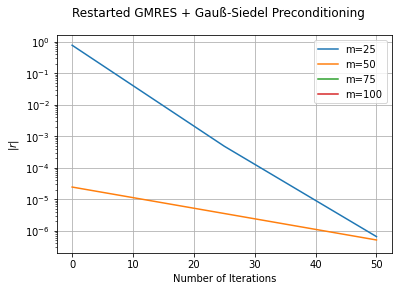

In [8]:
from data import restarted_gmres_100_precond_2, restarted_gmres_25_precond_2, restarted_gmres_50_precond_2, restarted_gmres_75_precond_2
gs_precond = [restarted_gmres_25_precond_2, restarted_gmres_50_precond_2, restarted_gmres_75_precond_2, restarted_gmres_100_precond_2]
iters = [[j['iter'] for j in i.iter_data] for i in gs_precond]
time = [np.cumsum(1000*np.array([j['duration'] for j in i.iter_data])) for i in gs_precond]
rho = [[j['rho'] for j in i.iter_data] for i in gs_precond]
num_vecs = [i.krylov_size for i in gs_precond]
fig, ax = plt.subplots()
fig.suptitle("Restarted GMRES + Gauß-Siedel Preconditioning")
ax.set_xlabel("Number of Iterations")
ax.set_ylabel("$\\|r\\|$")
ax.grid()
for data in zip(iters, rho, num_vecs):
    ax.semilogy(data[0], data[1], label=f"m={data[2]}")
_ = ax.legend()
fig.savefig("gfx/rgmres_gs_iter.png")

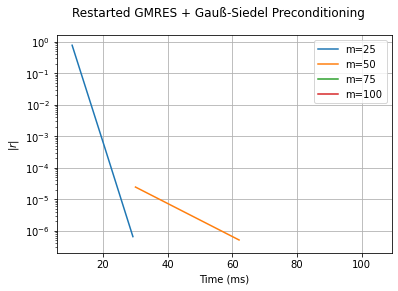

In [9]:
fig, ax = plt.subplots()
fig.suptitle("Restarted GMRES + Gauß-Siedel Preconditioning")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("$\\|r\\|$")
ax.grid()
for data in zip(time, rho, num_vecs):
    ax.semilogy(data[0], data[1], label=f"m={data[2]}")
_ = ax.legend()
fig.savefig("gfx/rgmres_gs_time.png")

512
293
55


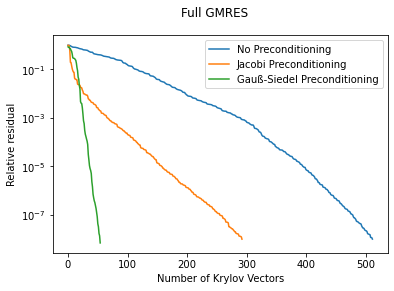

In [10]:
from data import fullgmres, fullgmres_j, fullgmres_gs
fullg = [fullgmres, fullgmres_j, fullgmres_gs]
x_data = [np.arange(len(i.residuals)) for i in fullg]
y_data = [i.residuals for i in fullg]
labels = ["No Preconditioning","Jacobi Preconditioning", "Gauß-Siedel Preconditioning"]
fig, ax = plt.subplots()
fig.suptitle("Full GMRES")
ax.set_xlabel("Number of Krylov Vectors")
ax.set_ylabel("Relative residual")
for d in zip(x_data, y_data, labels):
    ax.semilogy(d[0],d[1], label=d[2])
    print(len(d[0]))
_ = ax.legend()
fig.savefig("gfx/full_gmres.png")

In [11]:
fullgmres.problem_size

1030